<h1 style="text-align:center;"> Bank Customer Churn Analytics
    <img src="https://cdn.searchenginejournal.com/wp-content/uploads/2020/02/10-great-google-analytics-alternatives-5e4175671fa6a.png" style="width:200x;height:200px;"> 

In [3]:
# The code was removed by Watson Studio for sharing.

<h1>Introduction</h1>

We aim to accomplist the following for this study:

1. Identify and visualize which factors contribute to customer churn:

2. Build a prediction model that will perform the following:

    2.i. Classify if a customer is going to churn or not
    
    2.ii. Preferably and based on model performance, choose a model that will attach a probability to the churn to make it easier for customer service to target low hanging fruits in their efforts to prevent churn

<h2>Dataset review & wrangling</h2> 

In this section we will aim to understand the data, clean the data & make it ready for our predictive model. Data elements which are not relevant will be removed & missing values would be handle appropriately to reduce the noise in the predictive modeling.

<b>Making connections & Importing data</b>

In [9]:
# The code was removed by Watson Studio for sharing.

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<b>Data Wrangling</b>

In [7]:
df_customer = df_data_2.drop(['RowNumber','CustomerId','Surname'], axis=1)
df_customer = df_customer.dropna()
df_customer.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<b>Analyzing data</b>

In [12]:
print('Total rows & columns in table: ',df_customer.shape)

Total rows & columns in table:  (10000, 11)


In [14]:
print('Unique values per column: ')
print(df_customer.nunique())

Unique values per column: 
CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64


<h1>Data Exploration</h1>

In this section we would explore the data to understand what elements are contributing or could contribute for churning customers. This will keep in account the present data & try to establish relationships between them & also with the churning as well.

<b style="text-decoration: underline;">Categorical Relationship</b>

<b>Retained vs Churned Customer</b>

Below is the ratio between the churned customers vs the retained.

0    7963
1    2037
Name: Exited, dtype: int64


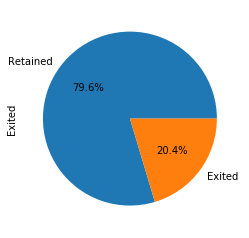

In [11]:
df_graph = df_customer['Exited'].value_counts()
print(df_graph)
df_graph.plot(kind='pie',autopct='%1.1f%%',labels=('Retained','Exited'))
plt.show()

<b>Geographical Impact</b>

Below graph depicts that most customer which are churned from germany. Not only the churned customer, it also depicts that France has most of the retained customers with respect to Germany & Spain. We can deduce from this that their could be taken some protective measures & enhanced services can be provided to the Germany & Spain Entities.

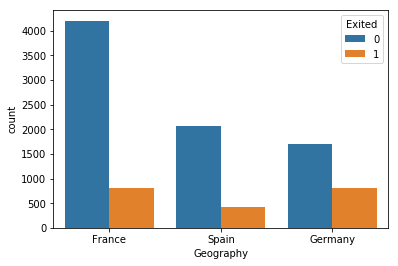

In [15]:
sns.countplot(data=df_customer,x='Geography',hue='Exited')
plt.xlabel('Geography')
plt.show()

<b>Gender Impact</b>

For churned there is not much information can be deduce from gender data. But females are less interested than males. May be some rebates and plan can be introduced for females to increase sales from that area as well.

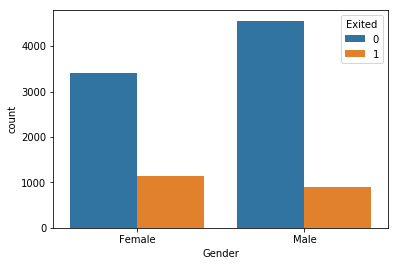

In [14]:
sns.countplot(data=df_customer,x='Gender',hue='Exited')
plt.xlabel('Gender')
plt.show()

<b>Credit Card Impact</b>

People who have credit card are more prone to churn out. Probably because of poor service or competitors have better plans for credit card. This can be rectified by introducing new features for the product.

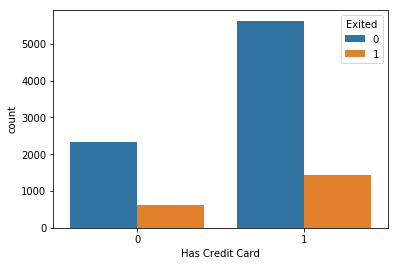

In [15]:
sns.countplot(data=df_customer,x='HasCrCard',hue='Exited')
plt.xlabel('Has Credit Card')
plt.show()

<b>Active Members Impact</b>

Members who aren't actively using banking services are most likely to churn out & close their accounts. Targeting them and providing them new services & features may turn these customers to retain in the future.

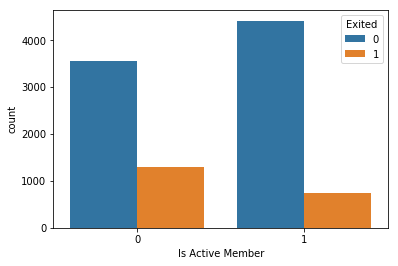

In [16]:
sns.countplot(data=df_customer,x='IsActiveMember',hue='Exited')
plt.xlabel('Is Active Member')
plt.show()

<b style="text-decoration: underline;">Continuous Relationship</b>

<b>Age Factor</b>

From below boxplot graph we can see people who are in the age bracket 40-50 are more prone to churn out.

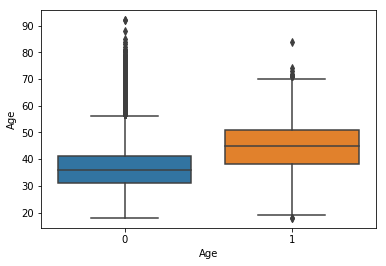

In [17]:
sns.boxplot(data=df_customer,x='Exited',y='Age')
plt.xlabel('Age')
plt.show()

<b>Tenure Factor</b>


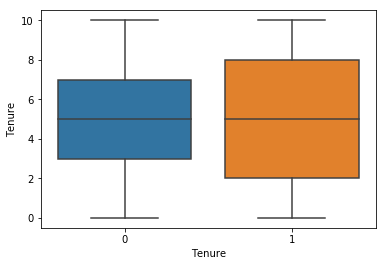

In [18]:
sns.boxplot(data=df_customer,x='Exited',y='Tenure')
plt.xlabel('Tenure')
plt.show()

<b>Credit Score Factor</b>


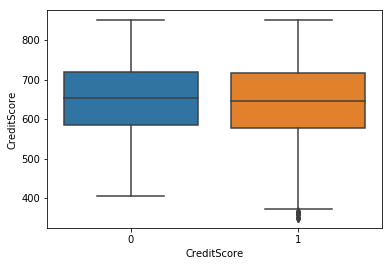

In [19]:
sns.boxplot(data=df_customer,x='Exited',y='CreditScore')
plt.xlabel('CreditScore')
plt.show()

<b>Salary Factor</b>


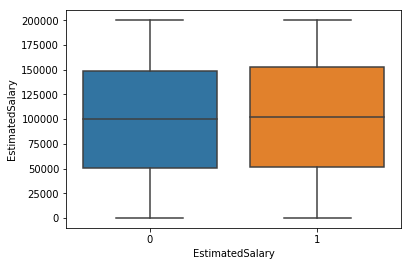

In [20]:
sns.boxplot(data=df_customer,x='Exited',y='EstimatedSalary')
plt.xlabel('EstimatedSalary')
plt.show()

<h1> Predictive Modeling</h1>

After exploring the data & understanding what can contribute for a customer to churn out, we will focus on a predictive model which will help us to predict which customers can churn out at an early stage & help the bank to retain such customers by taking appropriate protective measures.

To deduce such model we will use <b>Supervised learning</b> models and for this case we will go ahead with the classification model, K-Neares Neighbour.


<b>Data Encoding</b>

First we need to encode the data for different types of classification such as Geography & Gender as shown below.

In [17]:
le = preprocessing.LabelEncoder()
df_customer_feat = df_customer[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited']]
df_cust_encoded = df_customer.apply(le.fit_transform)
df_cust_encoded.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,228,0,0,24,2,0,0,1,1,5068,1
1,217,2,0,23,1,743,0,0,1,5639,0
2,111,0,0,24,8,5793,2,1,0,5707,1
3,308,0,0,21,1,0,1,0,0,4704,0
4,459,2,0,25,2,3696,0,1,1,3925,0



<b>Next we will segregate the dependent variable & independent variable</b>


In [18]:
X = df_cust_encoded[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']]
y = df_cust_encoded['Exited']

print('Independent Variables: ',X[0:5])
print('Dependent Variable: ',y[0:5])

Independent Variables:     CreditScore  Geography  Gender  Age  Tenure  Balance  NumOfProducts  \
0          228          0       0   24       2        0              0   
1          217          2       0   23       1      743              0   
2          111          0       0   24       8     5793              2   
3          308          0       0   21       1        0              1   
4          459          2       0   25       2     3696              0   

   HasCrCard  IsActiveMember  EstimatedSalary  
0          1               1             5068  
1          0               1             5639  
2          1               0             5707  
3          0               0             4704  
4          1               1             3925  
Dependent Variable:  0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64



<b>For data like this which has various type of features, we have to normalize all the features</b>


In [19]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:3]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


array([[-0.32733113, -0.90188624, -1.09598752,  0.29379269, -1.04175968,
        -0.95843157, -0.91158349,  0.64609167,  0.97024255,  0.02403506],
       [-0.44133106,  1.51506738, -1.09598752,  0.19838686, -1.38753759,
        -0.60880528, -0.91158349, -1.54776799,  0.97024255,  0.2218479 ],
       [-1.53987591, -0.90188624, -1.09598752,  0.29379269,  1.03290776,
         1.7675241 ,  2.52705662,  0.64609167, -1.03067011,  0.2454053 ]])

<b>Further segrarting our train dataset & test dataset for our predictive model</b>

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=40)
print('Train Dataset: ', X_train[0:3])
print('Test Dataset: ', X_test[0:3])

Train Dataset:  [[ 0.23230493  0.30659057 -1.09598752  3.63299643  1.72446358 -0.73915048
   0.80773656 -1.54776799  0.97024255 -0.71386574]
 [ 0.54321384 -0.90188624  0.91241915 -0.18323642 -1.38753759  1.58353503
  -0.91158349  0.64609167 -1.03067011 -1.37763003]
 [ 0.47066843  0.30659057  0.91241915 -0.66026553 -0.35020386 -0.59892352
  -0.91158349 -1.54776799  0.97024255 -0.84481715]]
Test Dataset:  [[ 1.03030448  1.51506738 -1.09598752 -0.46945388  1.37868567  0.26502515
  -0.91158349 -1.54776799 -1.03067011  0.88699792]
 [-0.65896731  0.30659057 -1.09598752 -0.0878306  -1.73331549  1.04333184
   0.80773656 -1.54776799 -1.03067011 -1.19298162]
 [-0.56569463 -0.90188624  0.91241915 -1.70972956 -0.35020386  2.03856682
   0.80773656 -1.54776799  0.97024255  1.68171362]]



<b>Trying to deduce the best K for our algorithm by running our model in loop for different values of K.</b>


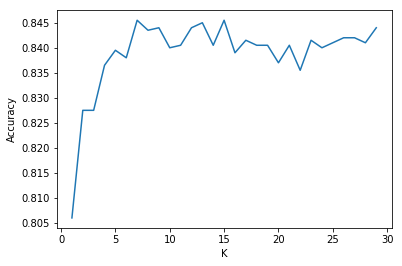

In [35]:
df_k = pd.DataFrame(data={'K':np.nan,'Accuracy':np.nan},index=[0])
df_k_final = pd.DataFrame(data={'K':np.nan,'Accuracy':np.nan},index=[0])
for i in range(1,30):
    k=i
    knn_model = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
    yhat = knn_model.predict(X_test)
    score = metrics.accuracy_score(y_test,yhat)
    df_k['K'] = i
    df_k['Accuracy'] = score
    df_k_final = df_k_final.append(df_k)
sns.lineplot(data=df_k_final,x='K',y='Accuracy')
plt.show()

<b>From above graph we can see that the best score is at K = 15 i.e. 0.8455. Hence, in our model we will go with K=15. Below is the predictive list which came after running our model</b>

In [39]:
knn_model = KNeighborsClassifier(n_neighbors=15,).fit(X_train,y_train)
yhat = knn_model.predict(X_test)
print('Model ran successfully')
print('Predicting values for ',X_test[0:1], 'is ', yhat[0:1])

Model ran successfully
Predicting values for  [[ 1.03030448  1.51506738 -1.09598752 -0.46945388  1.37868567  0.26502515
  -0.91158349 -1.54776799 -1.03067011  0.88699792]] is  [0]


<b>We can also see the probability of the customer if it will leave the bank through this model. For example:</b>

In [37]:
knn_model = KNeighborsClassifier(n_neighbors=15,).fit(X_train,y_train)
yhat = knn_model.predict_proba(X_test)
print('Model ran successfully')
print('For features ',X_test[0:1], 'probability of the customer to leave is ', yhat[1:2,1:2])

Model ran successfully
For features  [[ 1.03030448  1.51506738 -1.09598752 -0.46945388  1.37868567  0.26502515
  -0.91158349 -1.54776799 -1.03067011  0.88699792]] probability of the customer to leave is  [[0.26666667]]


<h1>Model Accuracy</h1>

In [40]:
score = knn_model.score(X_test,y_test)
print('Accuracy score of the model: ',score)

Accuracy score of the model:  0.8455


<h1>Conclusion</h1>

I have used only one predictive model here as shown in previous section. In predictive analytics & machine learning, its not the best practice to use just one model & go with it. The accuracy method here also can be sometimes misleading. So the best way to do this to try your data set which you prepared with different models, evaluate your model with different metrices like Logloss, confusion matrix etc and then choose the best model which performs well in all the parameters.